In [2]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.linear_model as linear_model
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import copy

In [41]:
# original ames dataframe
ames_df = pd.read_csv("../data/AmesHousing.txt", sep="\t")

Let's check if we have any duplicate PID:

In [42]:
len(ames_df["PID"]) == len(set(ames_df["PID"]))

True

In [43]:
#for the purpose of this project, let's drop PID column.
ames_df = ames_df.drop('PID', axis=1)
ames_df_columns = ames_df.columns
#len(ames_df_columns)
# ames_df_labels = ames_df.pop('SalePrice')

In [44]:
# for processing with NAs
ames_df2 = copy.copy(ames_df)

In [45]:
train = copy.copy(ames_df)
df = copy.copy(train)

In [46]:
ames_df.get_dtype_counts()

float64    11
int64      27
object     43
dtype: int64

In [18]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
Order              2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2930 non-null object
Roof Matl          2

In [19]:
ames_df.head()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [21]:
ames_df_rows_n, ames_df_columns_n = ames_df.shape
print("rows = {0} columns = {1}".format(ames_df_rows_n,ames_df_columns_n))

rows = 2930 columns = 81


In [47]:
quantitative = list(ames_df._get_numeric_data().columns)
print("Quantitative variables are:\n")
print(quantitative)

qualitative = list(set(ames_df_columns) - set(quantitative))
print("Qualitative variables are:\n")
print(qualitative)

Quantitative variables are:

['Order', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']
Qualitative variables are:

['BsmtFin Type 1', 'Exterior 2nd', 'Land Contour', 'Bldg Type', 'Foundation', 'Exterior 1st', 'Bsmt Exposure', 'Garage Finish', 'Alley', 'Roof Style', 'Neighborhood', 'MS Zoning', 'Lot Shape', 'Street', 'Roof Matl', 'Land Slope', 'Pool QC', 'Paved Drive', 'Electrical', 'Central Air', 'Garage Cond', 'Lot Config', 'Mas Vnr Type', 'Exter Cond', 'Heating QC', 'Condition 

Categorical (Nominal): A categorical variable is one that has two or more categories, but there is no intrinsic ordering to the categories.  e.g.- house style- 1 story, 2 story etc.

Ordinal: An ordinal variable is similar to a categorical variable but there is a clear ordering of the variables. e.g.- pool quality.

Electrical           1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        23
Mas Vnr Type        23
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 2      81
Bsmt Exposure       83
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Lot Frontage       490
Fireplace Qu      1422
Fence             2358
Alley             2732
Misc Feature      2824
Pool QC           2917
dtype: int64

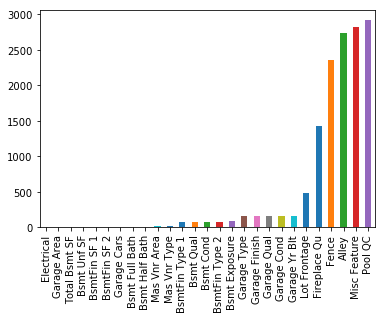

In [48]:
missing_ames = ames_df.isnull().sum()
missing_ames_print = missing_ames[missing_ames > 0]
missing_ames_print = missing_ames_print.sort_values()
missing_ames_print.plot.bar()
missing_ames_print

In [49]:
missing_ames = ames_df.isnull().sum()
missing_quant=missing_ames[qualitative] 
missing_quant['SalePrice']=0
missing_quant=missing_quant[missing_quant>0]
missing_quant_df= pd.DataFrame()
missing_quant_df[['absolute','relative']]= pd.concat([missing_quant,missing_quant/ames_df.shape[0]],axis=1)
missing_quant_df

,absolute,relative
BsmtFin Type 1,80,0.027304
Bsmt Exposure,83,0.028328
Garage Finish,159,0.054266
Alley,2732,0.932423
Pool QC,2917,0.995563
Electrical,1,0.000341
Garage Cond,159,0.054266
Mas Vnr Type,23,0.007850
Misc Feature,2824,0.963823
BsmtFin Type 2,81,0.027645


In [ ]:
# drop columns with too many missing values
ames_df = ames_df.drop(['Alley','Pool QC','Misc Feature', 'Fence', 'Fireplace Qu'], axis=1)
ames_df.shape

In [50]:
missing_qual=missing_values[quantitative]
missing_qual['SalePrice']=0
missing_qual=missing_qual[missing_qual>0]
missing_qual_df= pd.DataFrame()
missing_qual_df[['absolute','relative']]= pd.concat([missing_qual,missing_qual/ames_df.shape[0]],axis=1)
missing_qual_df

,absolute,relative
Lot Frontage,490,0.167235
Mas Vnr Area,23,0.007850
BsmtFin SF 1,1,0.000341
BsmtFin SF 2,1,0.000341
Bsmt Unf SF,1,0.000341
Total Bsmt SF,1,0.000341
Bsmt Full Bath,2,0.000683
Bsmt Half Bath,2,0.000683
Garage Yr Blt,159,0.054266
Garage Cars,1,0.000341


In [59]:
# print NA columns
'''
ind = ames_df['Garage Area'].isnull()
ames_df[ind]['Garage Area']
'''
# multiple ways to drop na
ames_df = ames_df.dropna(subset = ['Electrical','Garage Area', 'Total Bsmt SF', 'Bsmt Unf SF', 
                                   'BsmtFin SF 1','Garage Cars', 'BsmtFin SF 2', 'Bsmt Full Bath', 
                                   'Bsmt Half Bath', 'Mas Vnr Area', 'Mas Vnr Type'])
# ames_df = ames_df[np.isfinite(ames_df['Garage Area'])]
# ames_df = ames_df[pd.notnull(ames_df['Garage Area'])]

ames_df.shape

(2903, 76)

In [74]:
ames_df['MS Zoning'] = ames_df['MS Zoning'].fillna(ames_df['MS Zoning'].mode()[0])

ames_df['Lot Frontage'] = ames_df['Lot Frontage'].fillna(ames_df['Lot Frontage'].mean())

ames_df['Mas Vnr Type'] = ames_df['Mas Vnr Type'].fillna(ames_df['Mas Vnr Type'].mode()[0])

ames_df['Mas Vnr Area'] = ames_df['Mas Vnr Area'].fillna(ames_df['Mas Vnr Area'].mean())

for col in ('Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2'):
    ames_df[col] = ames_df[col].fillna('NoBSMT')

ames_df['BsmtFin SF 1'] = ames_df['BsmtFin SF 1'].fillna(0)   
ames_df['BsmtFin SF 2'] = ames_df['BsmtFin SF 2'].fillna(0)  
    
ames_df['Bsmt Full Bath'] = ames_df['Bsmt Full Bath'].fillna(ames_df['Bsmt Full Bath'].median())
ames_df['Bsmt Half Bath'] = ames_df['Bsmt Half Bath'].fillna(ames_df['Bsmt Half Bath'].median())

ames_df['Bsmt Unf SF'] = ames_df['Bsmt Unf SF'].fillna(ames_df['Bsmt Unf SF'].mean())

ames_df['Exterior 1st'] = ames_df['Exterior 1st'].fillna(ames_df['Exterior 1st'].mode()[0])
ames_df['Exterior 2nd'] = ames_df['Exterior 2nd'].fillna(ames_df['Exterior 2nd'].mode()[0])

ames_df['Functional'] = ames_df['Functional'].fillna(ames_df['Functional'].mode()[0])

ames_df['Total Bsmt SF'] = ames_df['Total Bsmt SF'].fillna(0)

ames_df['Electrical'] = ames_df['Electrical'].fillna(ames_df['Electrical'].mode()[0])

ames_df['Kitchen Qual'] = ames_df['Kitchen Qual'].fillna(ames_df['Kitchen Qual'].mode()[0])

ames_df['Garage Area'] = ames_df['Garage Area'].fillna(0.0)

for col in ('Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond'):
    ames_df[col] = ames_df[col].fillna('NoGRG')

ames_df['Garage Cars'] = ames_df['Garage Cars'].fillna(0)

ames_df['Sale Type'] = ames_df['Sale Type'].fillna(ames_df['Sale Type'].mode()[0])

ames_df['Utilities'] = ames_df['Utilities'].fillna(ames_df['Utilities'].mode()[0])

ames_df['Total SF'] = ames_df['Total Bsmt SF'] + ames_df['1st Flr SF'] + ames_df['2nd Flr SF']
ames_df.drop(['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Garage Yr Blt'], axis=1, inplace=True)

KeyError: 'Total Bsmt SF'

In [81]:
# restore the qualitative and quantitative cols
ames_df_columns = ames_df.columns
quantitative = list(ames_df._get_numeric_data().columns)
print("Quantitative variables are:\n")
print(quantitative)

qualitative = list(set(ames_df_columns) - set(quantitative))
print("Qualitative variables are:\n")
print(qualitative)

Quantitative variables are:

['Order', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice', 'Total SF']
Qualitative variables are:

['BsmtFin Type 1', 'Exterior 2nd', 'Land Contour', 'Bldg Type', 'Foundation', 'Exterior 1st', 'Bsmt Exposure', 'Garage Finish', 'Roof Style', 'Neighborhood', 'MS Zoning', 'Lot Shape', 'Street', 'Roof Matl', 'Land Slope', 'Paved Drive', 'Electrical', 'Central Air', 'Garage Cond', 'Lot Config', 'Mas Vnr Type', 'Exter Cond', 'Heating QC', 'Condition 1', 'Exter Qual', 'Heating', 'Condition 2', 'Utilities', 'BsmtFin Type

In [32]:
ames_df2['Lot Frontage'].fillna(ames_df2['Lot Frontage'].median(), inplace = True)
ames_df2['Mas Vnr Area'].fillna(ames_df2['Mas Vnr Area'].median(), inplace = True)
ames_df2['Garage Yr Blt'].fillna(ames_df2['Garage Yr Blt'].median(), inplace = True)

In [ ]:
# replace na for categorical also



In [6]:
# ames_df.describe()
ames_df['SalePrice'].describe()

count      2903.000000
mean     180393.842921
std       79814.696125
min       12789.000000
25%      129100.000000
50%      160000.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([  8.,  47., 199., 538., 684., 478., 298., 213., 142.,  86.,  75.,
         30.,  41.,  25.,  11.,   9.,   4.,   3.,   3.,   3.,   4.,   0.,
          0.,   0.,   2.]),
 array([ 12789.  ,  42477.44,  72165.88, 101854.32, 131542.76, 161231.2 ,
        190919.64, 220608.08, 250296.52, 279984.96, 309673.4 , 339361.84,
        369050.28, 398738.72, 428427.16, 458115.6 , 487804.04, 517492.48,
        547180.92, 576869.36, 606557.8 , 636246.24, 665934.68, 695623.12,
        725311.56, 755000.  ]),
 <a list of 25 Patch objects>)

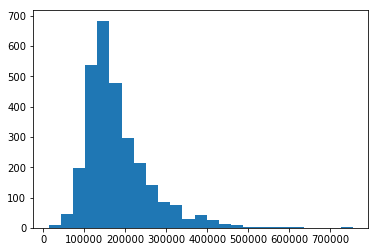

In [7]:
plt.hist(ames_df['SalePrice'], bins=25)

count    2930.000000
mean       12.020969
std         0.407587
min         9.456341
25%        11.771436
50%        11.982929
75%        12.271392
max        13.534473
Name: log_SalePrice, dtype: float64


(array([  2.,   0.,   0.,   0.,   3.,   3.,   8.,  27.,  49., 131., 314.,
        662., 619., 463., 315., 184.,  93.,  42.,  12.,   3.]),
 array([ 9.45634071,  9.66024732,  9.86415394, 10.06806055, 10.27196717,
        10.47587379, 10.6797804 , 10.88368702, 11.08759363, 11.29150025,
        11.49540687, 11.69931348, 11.9032201 , 12.10712672, 12.31103333,
        12.51493995, 12.71884656, 12.92275318, 13.1266598 , 13.33056641,
        13.53447303]),
 <a list of 20 Patch objects>)

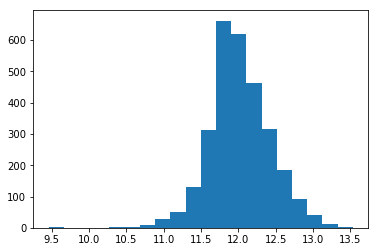

In [7]:
ames_df['log_SalePrice'] = np.log(ames_df['SalePrice'])
print(ames_df['log_SalePrice'].describe())
plt.hist(ames_df['log_SalePrice'], bins=20)

In [49]:
# approach 2 for encoding qualitative variables
# train.Street = pd.Categorical(train.Street).codes

In [93]:
# Encoding qualitative variables
# can i use one-hot encoding here? if yes, how?
# df_name = train

idx = 0

# probably won't need this but still storing it just in case.
mapping_list = []
for variable in qualitative:
    # unable to get this to work- see this
    # https://stackoverflow.com/questions/6181935/how-do-you-create-different-variable-names-while-in-a-loop
    # mapping_index = "mapping_index_" + str(idx)
    # print(mapping_index)
    ames_df[variable], mapping_index = pd.Series(ames_df[variable]).factorize()
    # idx += 1
    mapping_list.append(mapping_index)


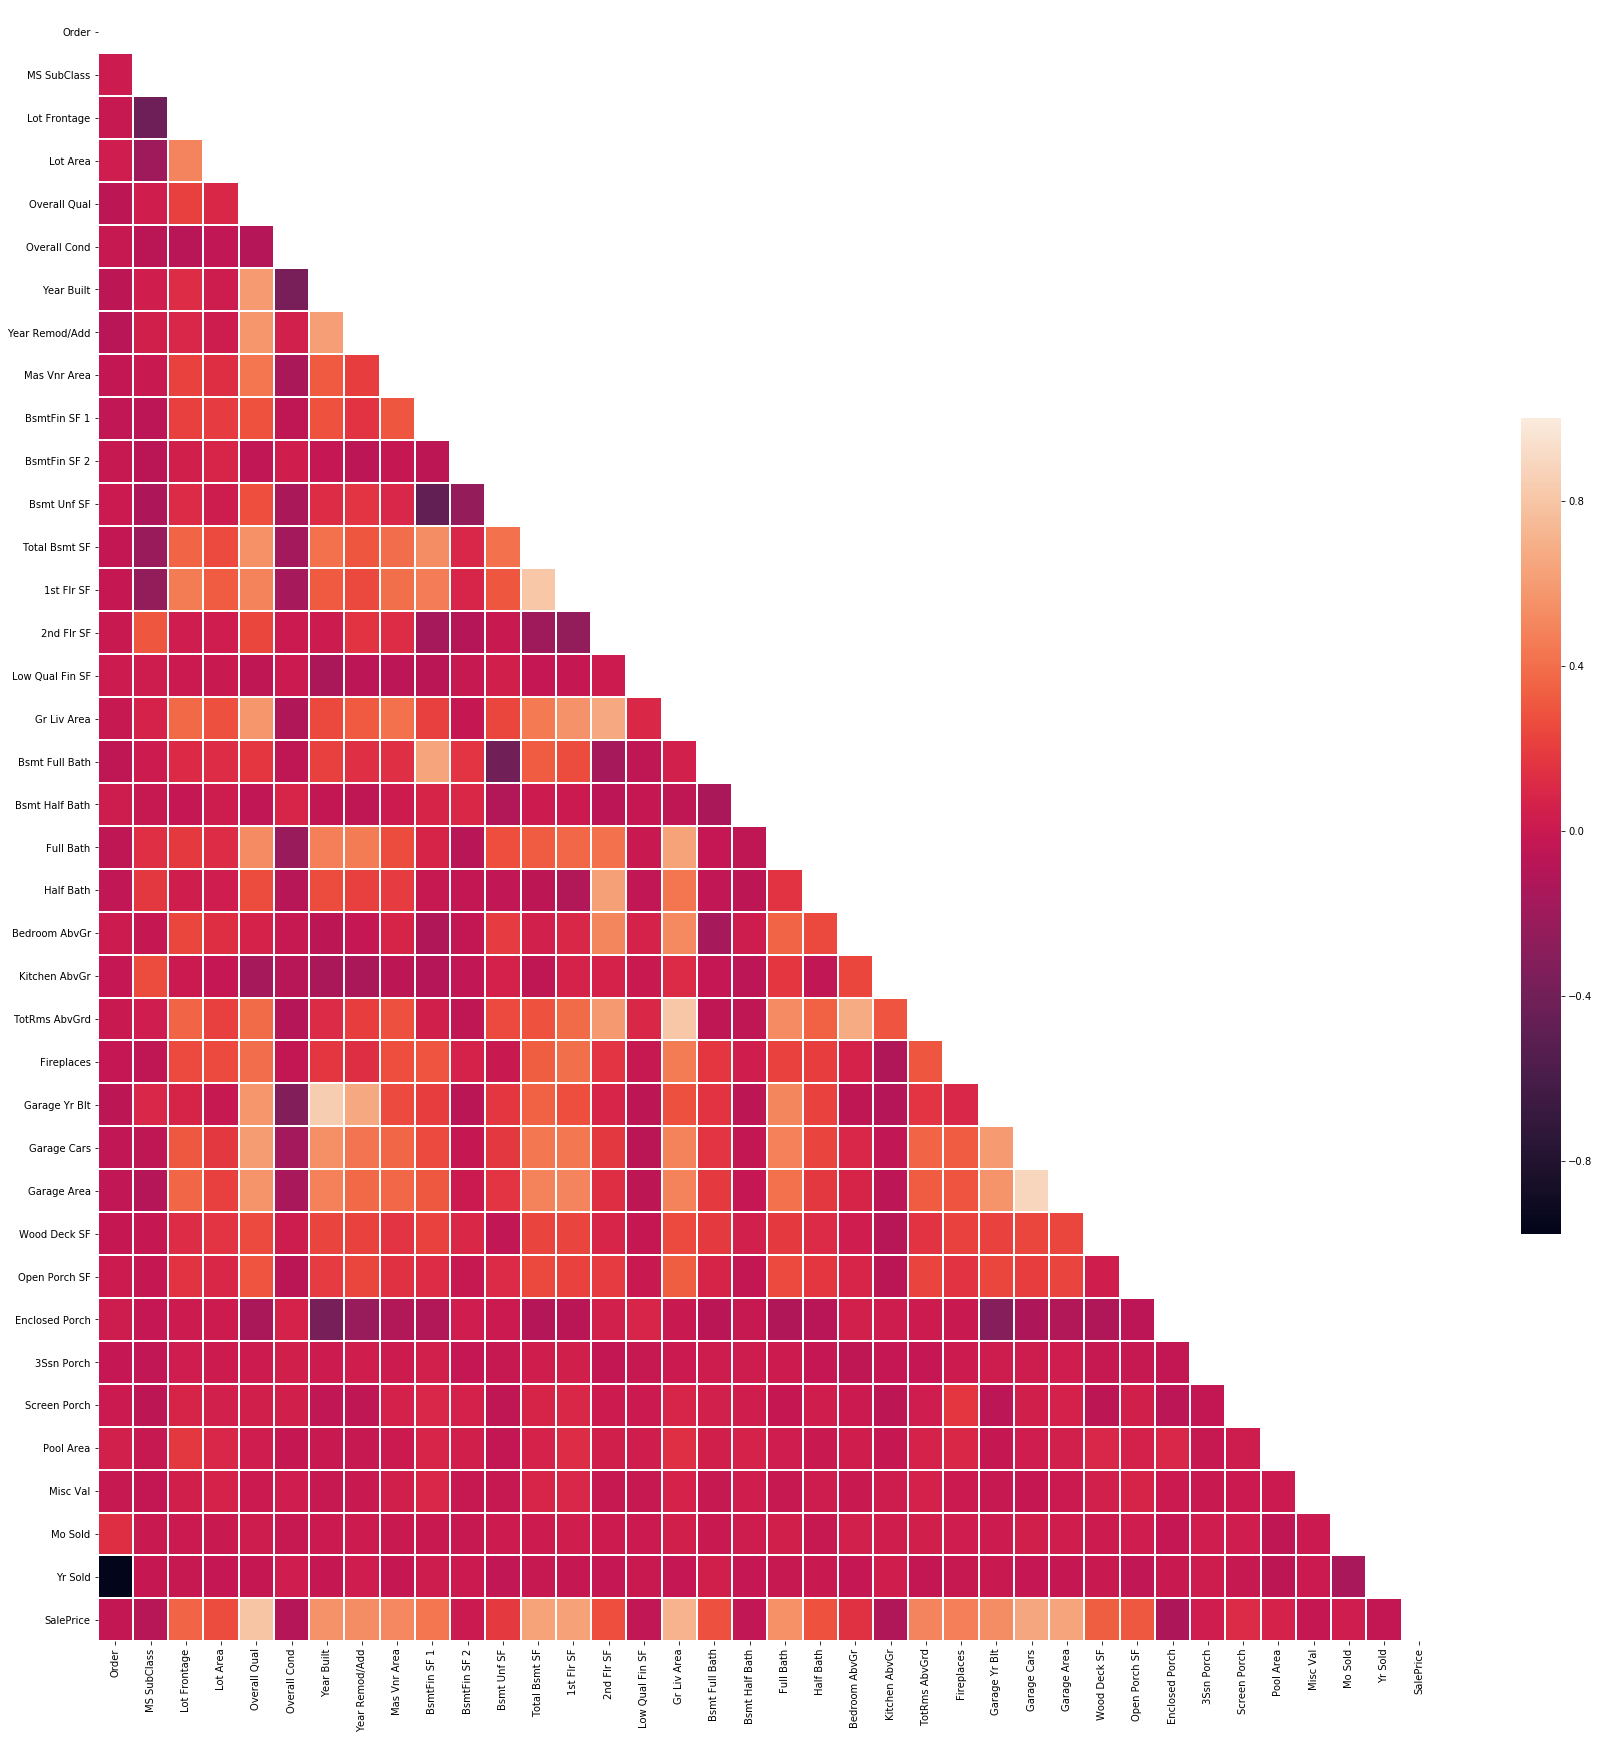

In [105]:
# correlation matrix for continuous variables 
corr = ames_df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (30, 30))
sns.heatmap(corr, 
            mask = mask, 
            xticklabels = 1, 
            yticklabels = 1,
            linewidths = 1, 
            cbar_kws = {"shrink": .5})

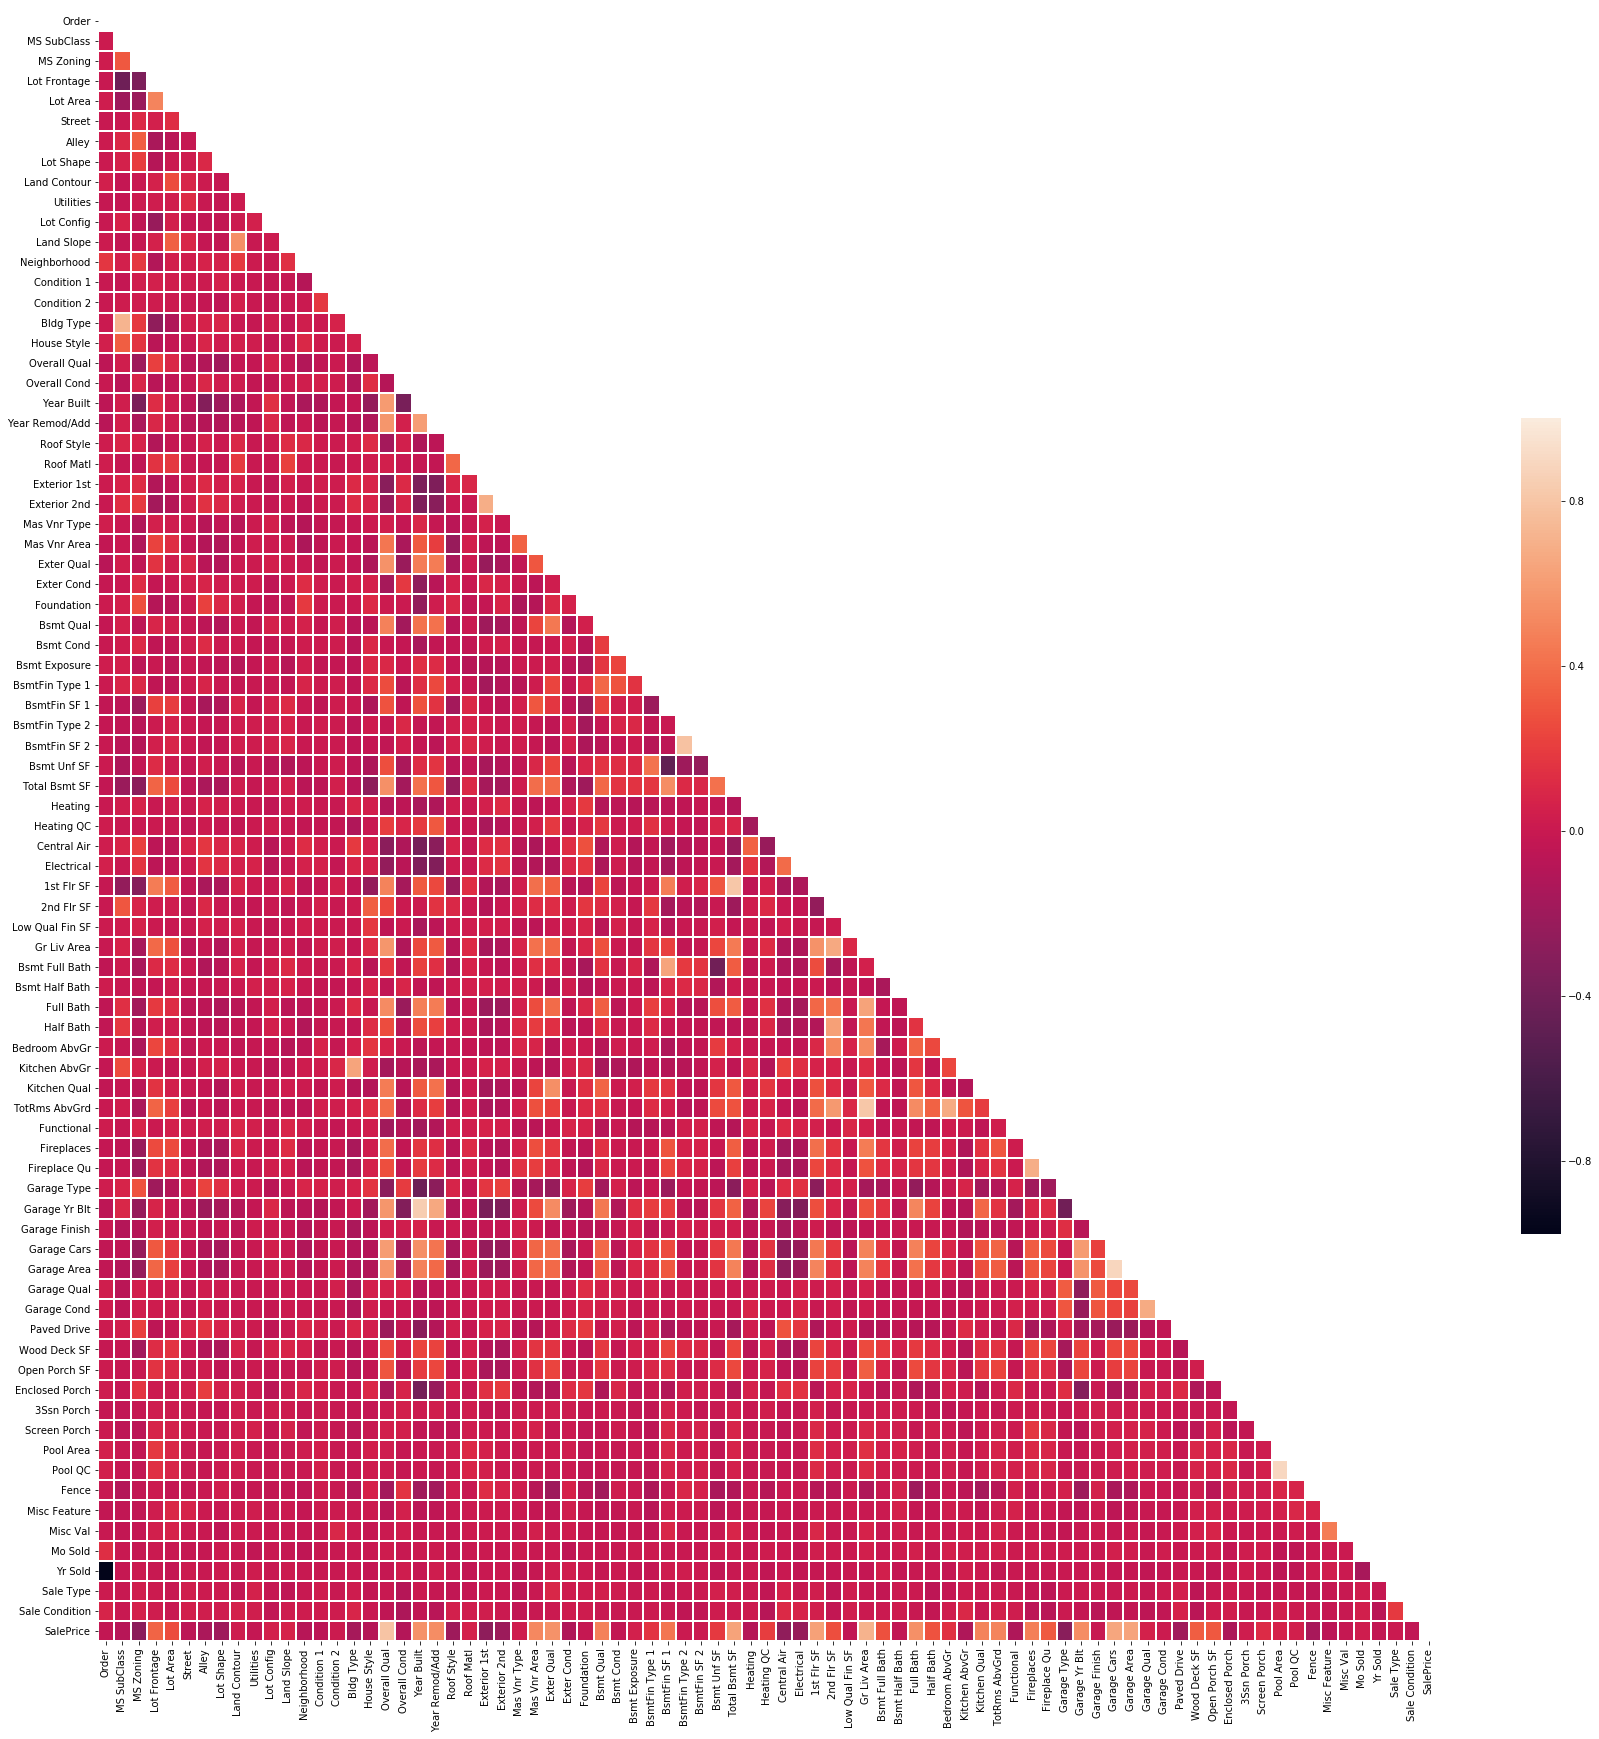

In [109]:
# correlation matrix for all variables

corr = train.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (30, 30))
sns.heatmap(corr, 
            mask = mask, 
            xticklabels = 1, 
            yticklabels = 1,
            linewidths = 1, 
            cbar_kws = {"shrink": .5})

In [109]:
corr = ames_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr = corr.SalePrice
corr

SalePrice          1.000000
Overall Qual       0.799121
Gr Liv Area        0.708248
Garage Cars        0.647001
Garage Area        0.639161
Total Bsmt SF      0.634647
1st Flr SF         0.625499
Year Built         0.558468
Full Bath          0.546100
Year Remod/Add     0.532265
Garage Yr Blt      0.531269
Mas Vnr Area       0.508606
TotRms AbvGrd      0.496296
Fireplaces         0.474912
BsmtFin SF 1       0.433796
Lot Frontage       0.356396
Wood Deck SF       0.328813
Open Porch SF      0.307211
Half Bath          0.282143
Bsmt Full Bath     0.276703
2nd Flr SF         0.271417
Lot Area           0.265792
Bsmt Unf SF        0.183368
Bedroom AbvGr      0.144928
Screen Porch       0.114262
Pool Area          0.069103
3Ssn Porch         0.032927
Mo Sold            0.030556
BsmtFin SF 2       0.008022
Misc Val          -0.015326
Yr Sold           -0.027831
Order             -0.033773
Bsmt Half Bath    -0.034763
Low Qual Fin SF   -0.037359
MS SubClass       -0.083610
Overall Cond      -0

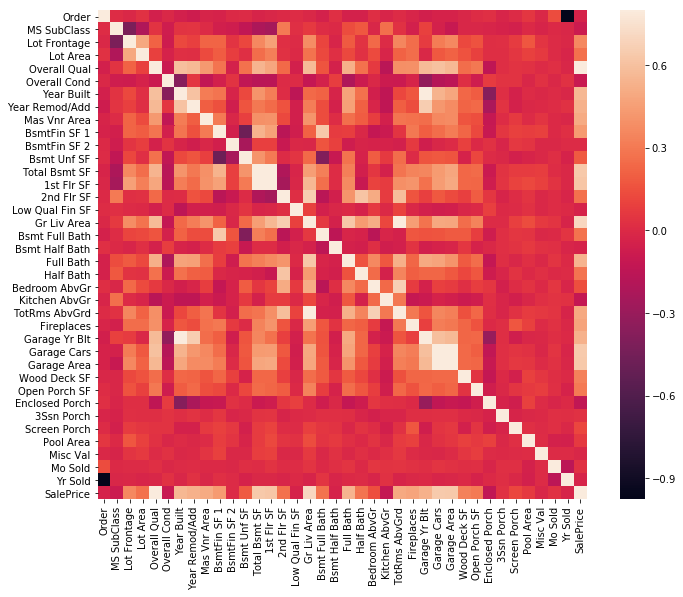

In [102]:
# for continuous only 
corr_mat = ames_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
# annot = True for specifying corr ratios
sns.heatmap(corr_mat, vmax=.8, square=True);

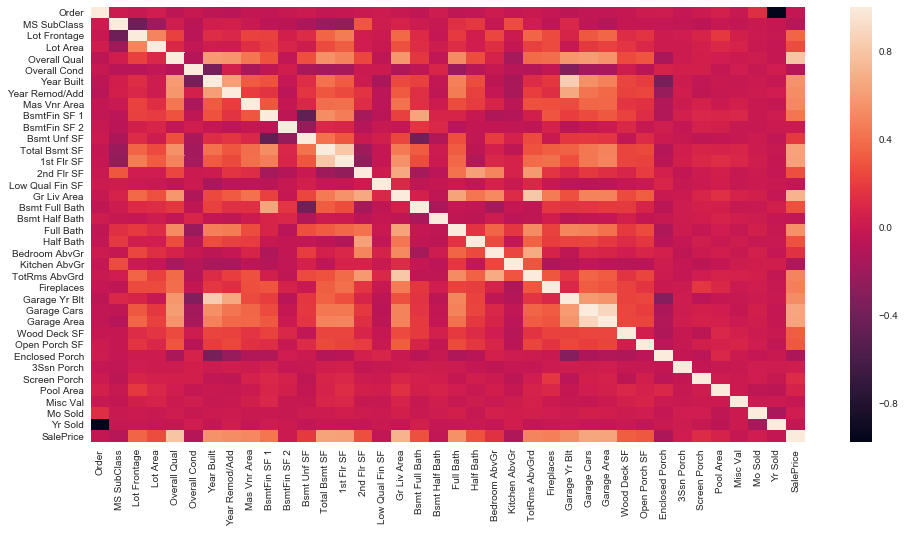

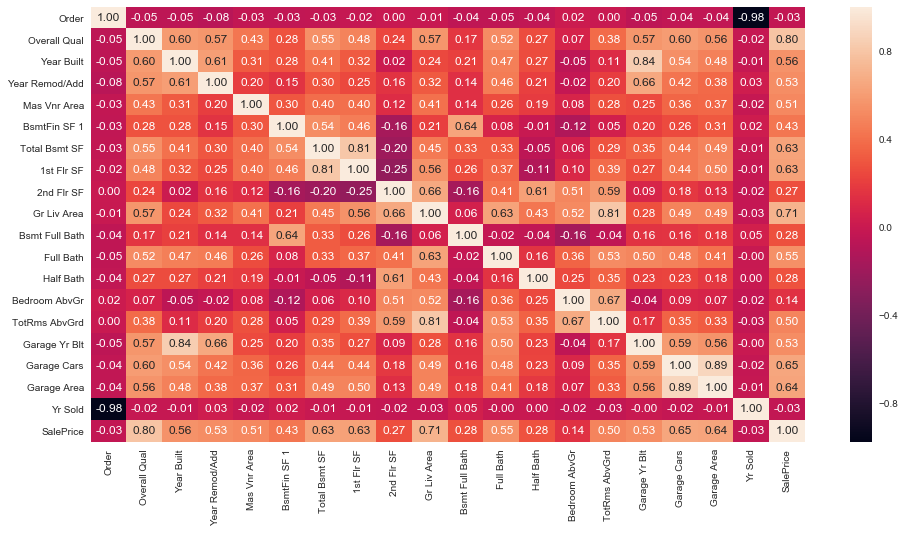

In [118]:
# other


corr=ames_df.corr() #obtain the correlation matrix
sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr,ax=ax)
aux=(abs(corr)-np.identity(corr.shape[0])).max() #maximum correlation of each variable
selected_feats=aux[aux>0.5].index#take only variables whose maximum correlation is strong.
sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(corr.loc[selected_feats,selected_feats], annot=True,fmt='.2f',ax=ax)
plt.show()

In [11]:
corr = ames_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
corr = corr.SalePrice
corr

SalePrice          1.000000
Overall Qual       0.799121
Gr Liv Area        0.708248
Garage Cars        0.647001
Garage Area        0.639161
Total Bsmt SF      0.634647
1st Flr SF         0.625499
Year Built         0.558468
Full Bath          0.546100
Year Remod/Add     0.532265
Garage Yr Blt      0.531269
Mas Vnr Area       0.508606
TotRms AbvGrd      0.496296
Fireplaces         0.474912
BsmtFin SF 1       0.433796
Lot Frontage       0.356396
Wood Deck SF       0.328813
Open Porch SF      0.307211
Half Bath          0.282143
Bsmt Full Bath     0.276703
2nd Flr SF         0.271417
Lot Area           0.265792
Bsmt Unf SF        0.183368
Bedroom AbvGr      0.144928
Screen Porch       0.114262
Pool Area          0.069103
3Ssn Porch         0.032927
Mo Sold            0.030556
BsmtFin SF 2       0.008022
Misc Val          -0.015326
Yr Sold           -0.027831
Order             -0.033773
Bsmt Half Bath    -0.034763
Low Qual Fin SF   -0.037359
MS SubClass       -0.083610
Overall Cond      -0

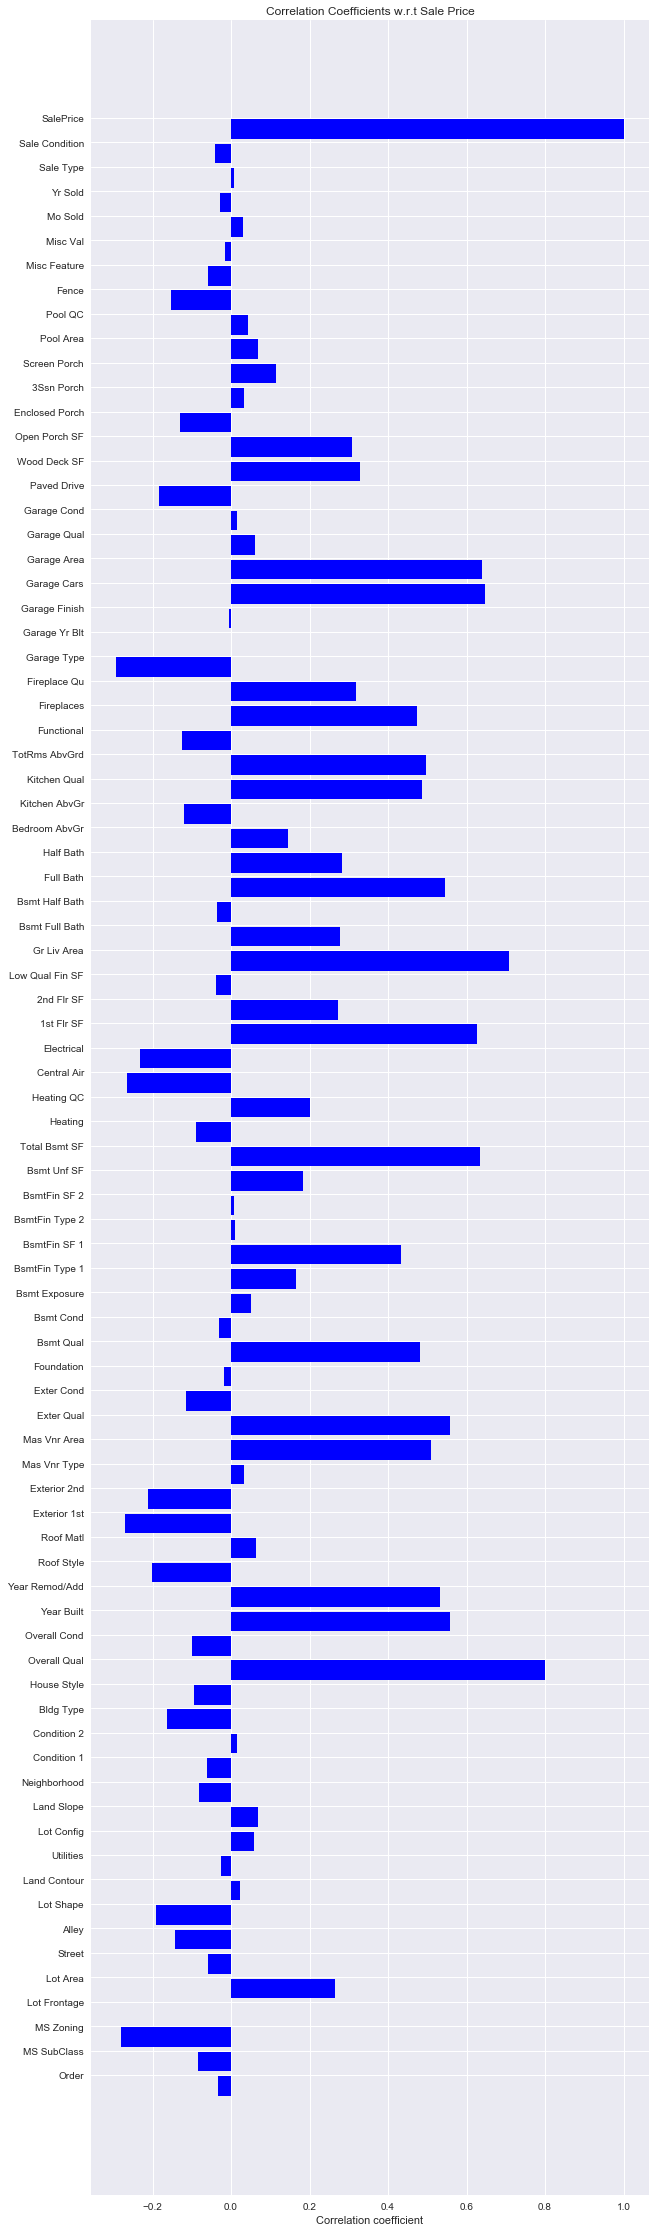

In [114]:
#other

labels = []
values = []
for i in ames_df_columns:
    labels.append(i)
    values.append(np.corrcoef(ames_df[i].values, ames_df.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10,40))
rects = ax.barh(ind, np.array(values), color='blue')
ax.set_yticks(ind+((width)/2))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [87]:
'''
def make_plots(ames_features = None, start_index = None, end_index = None, var_x = None, var_y = None):
    print(type(var_x))
    print(type(ames_features),type(start_index))
    if var_x:
            x,y = var_x, var_y            
            fig,axs=plt.subplots(1,3,figsize=(10,4))
            sns.boxplot(x,orient='v',ax=axs[0])
            sns.regplot(x,np.log(y),ax=axs[1])
            sns.regplot(x,y,ax=axs[2])
            plt.tight_layout()
    else:
        for i in ames_features[start_index:end_index]:
            x,y = ames_df[i],ames_df.SalePrice
            fig,axs=plt.subplots(1,3,figsize=(10,4))
            sns.boxplot(x,orient='v',ax=axs[0])
            sns.regplot(x,np.log(y),ax=axs[1])
            sns.regplot(x,y,ax=axs[2])
            plt.tight_layout()
            print(i, "done")
'''
print()

In [88]:
# use linear regression to see check residual distribution

def make_plots(ames_features , start_index, end_index ):
    for i in ames_features[start_index:end_index]:
        x,y = ames_df[i],ames_df.SalePrice
        fig,axs=plt.subplots(1,3,figsize=(10,4))
        sns.boxplot(x,orient='v',ax=axs[0])
        sns.regplot(x,np.log(y),ax=axs[1])
        sns.regplot(x,y,ax=axs[2])
        plt.tight_layout()
        print(i, "done")

In [89]:
# eliminate plots2 and combine it. can't figure out how to overload
# leaving overloading for now
def make_plots2( var_x , var_y ):
        x,y = var_x, var_y
        tmp=x.dropna()            
        fig,axs=plt.subplots(1,3,figsize=(10,4))
        sns.boxplot(x,orient='v',ax=axs[0])
        sns.regplot(x,np.log(y),ax=axs[1])
        sns.regplot(x,y,ax=axs[2])
        plt.tight_layout()

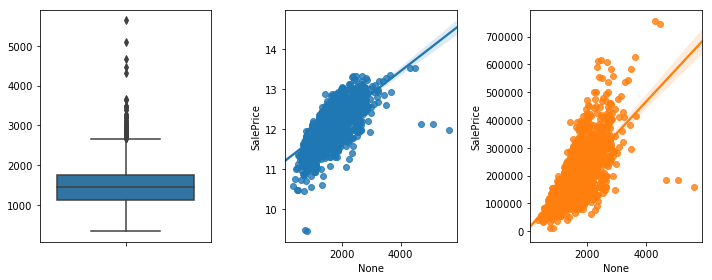

In [90]:
total_floor_sf = ames_df['1st Flr SF'] + ames_df['2nd Flr SF']
var_x = total_floor_sf
var_y = ames_df.SalePrice
make_plots2(var_x , var_y)

Roof Style done
Central Air done
Neighborhood done
Pool QC done
Bsmt Cond done


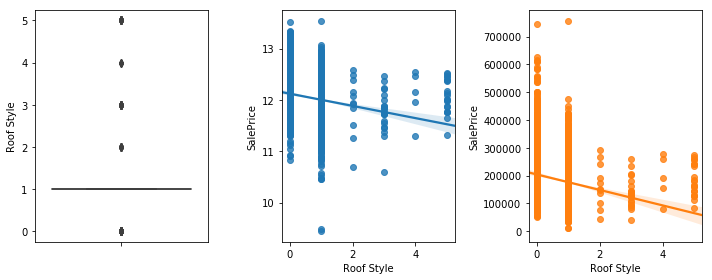

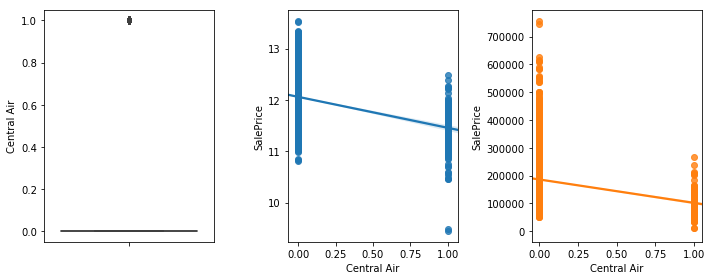

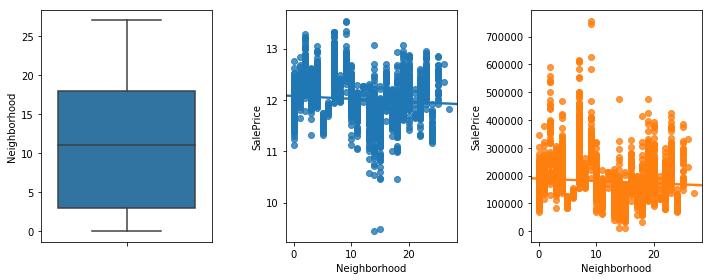

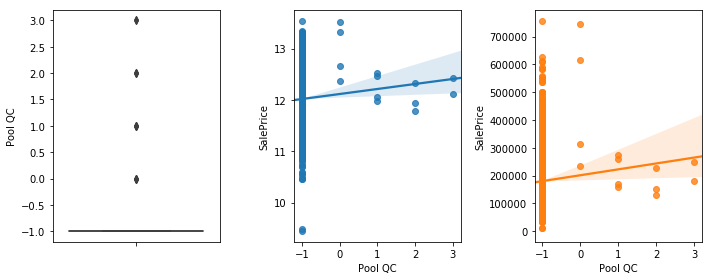

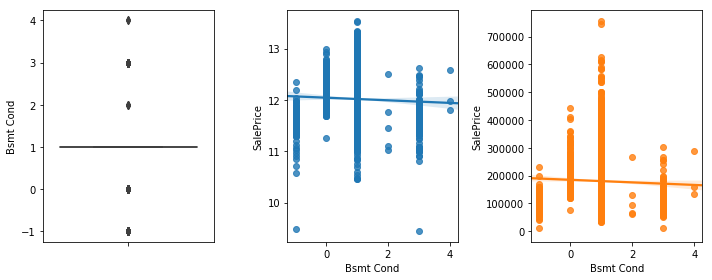

In [92]:
ames_features = qualitative
start_index = 0
end_index = 5
make_plots(ames_features, start_index, end_index)
# quick note- may need to convert mapping index to dict from list

Order
MS SubClass
Lot Frontage
Lot Area
Overall Qual


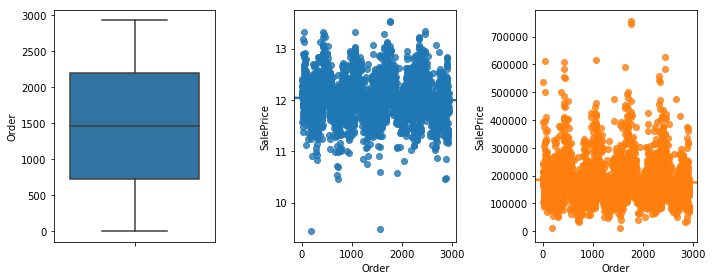

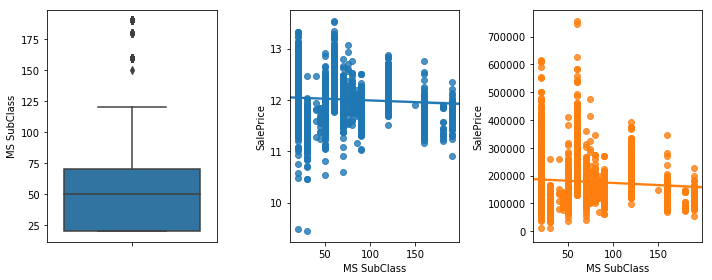

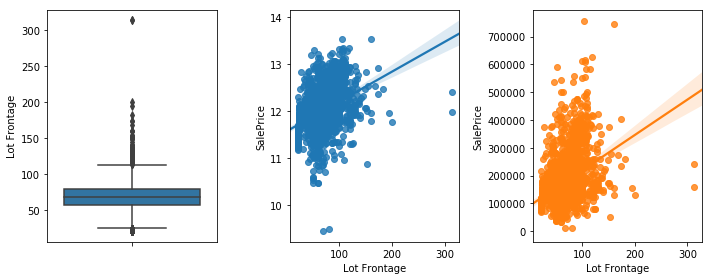

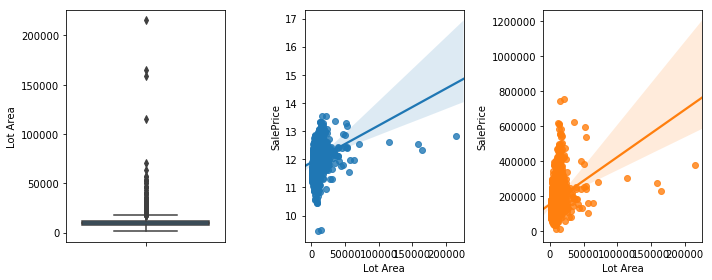

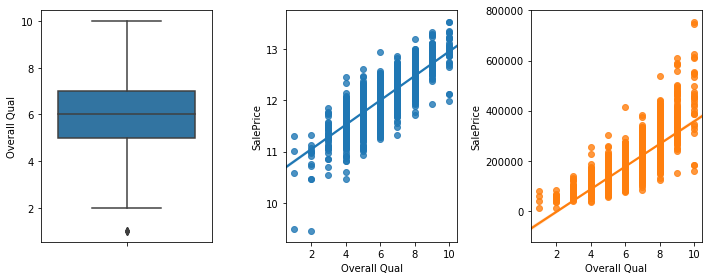

In [37]:
ames_features = quantitative
start_index = 0
end_index = 5
make_plots(ames_features, start_index, end_index)

'Lot Frontage' has 2 outliers

The force is strong with 'Overall Qual'. Strong positive relationship

Overall Cond- no outlier but shows a slightly negative relationship

Year Built- strong positive relationship

In [120]:
correlation_ratio = 0.5
indices = np.where(corr_mat > correlation_ratio)
indices = [(corr_mat.index[x], corr_mat.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y and corr_mat.columns[y] == 'SalePrice']
indices

[('Overall Qual', 'SalePrice'),
 ('Year Built', 'SalePrice'),
 ('Year Remod/Add', 'SalePrice'),
 ('Mas Vnr Area', 'SalePrice'),
 ('Total Bsmt SF', 'SalePrice'),
 ('1st Flr SF', 'SalePrice'),
 ('Gr Liv Area', 'SalePrice'),
 ('Full Bath', 'SalePrice'),
 ('Garage Yr Blt', 'SalePrice'),
 ('Garage Cars', 'SalePrice'),
 ('Garage Area', 'SalePrice')]

In [1]:
# print the values in matrix itself instead of printing here
# corr_mat

In [76]:
def corrank(X):
        df = pd.DataFrame([[(i,j),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))], columns=['Features','corr'])    
        return df.sort_values(by='corr',ascending=False)

corrank_df = corrank(ames_df)
corrank_df.head(10)

,Features,corr
675,"(Garage Cars, Garage Area)",0.889494
263,"(Year Built, Garage Yr Blt)",0.842300
416,"(Total Bsmt SF, 1st Flr SF)",0.812173
516,"(Gr Liv Area, TotRms AbvGrd)",0.807422
212,"(Overall Qual, SalePrice)",0.799121
530,"(Gr Liv Area, SalePrice)",0.708248
606,"(Bedroom AbvGr, TotRms AbvGrd)",0.671077
466,"(2nd Flr SF, Gr Liv Area)",0.660483
293,"(Year Remod/Add, Garage Yr Blt)",0.655820
685,"(Garage Cars, SalePrice)",0.647001


We can't just drop all rows with NA values as NA at most places means a lack of a particular entity. e.g.- pool QC = NA means lack of pool

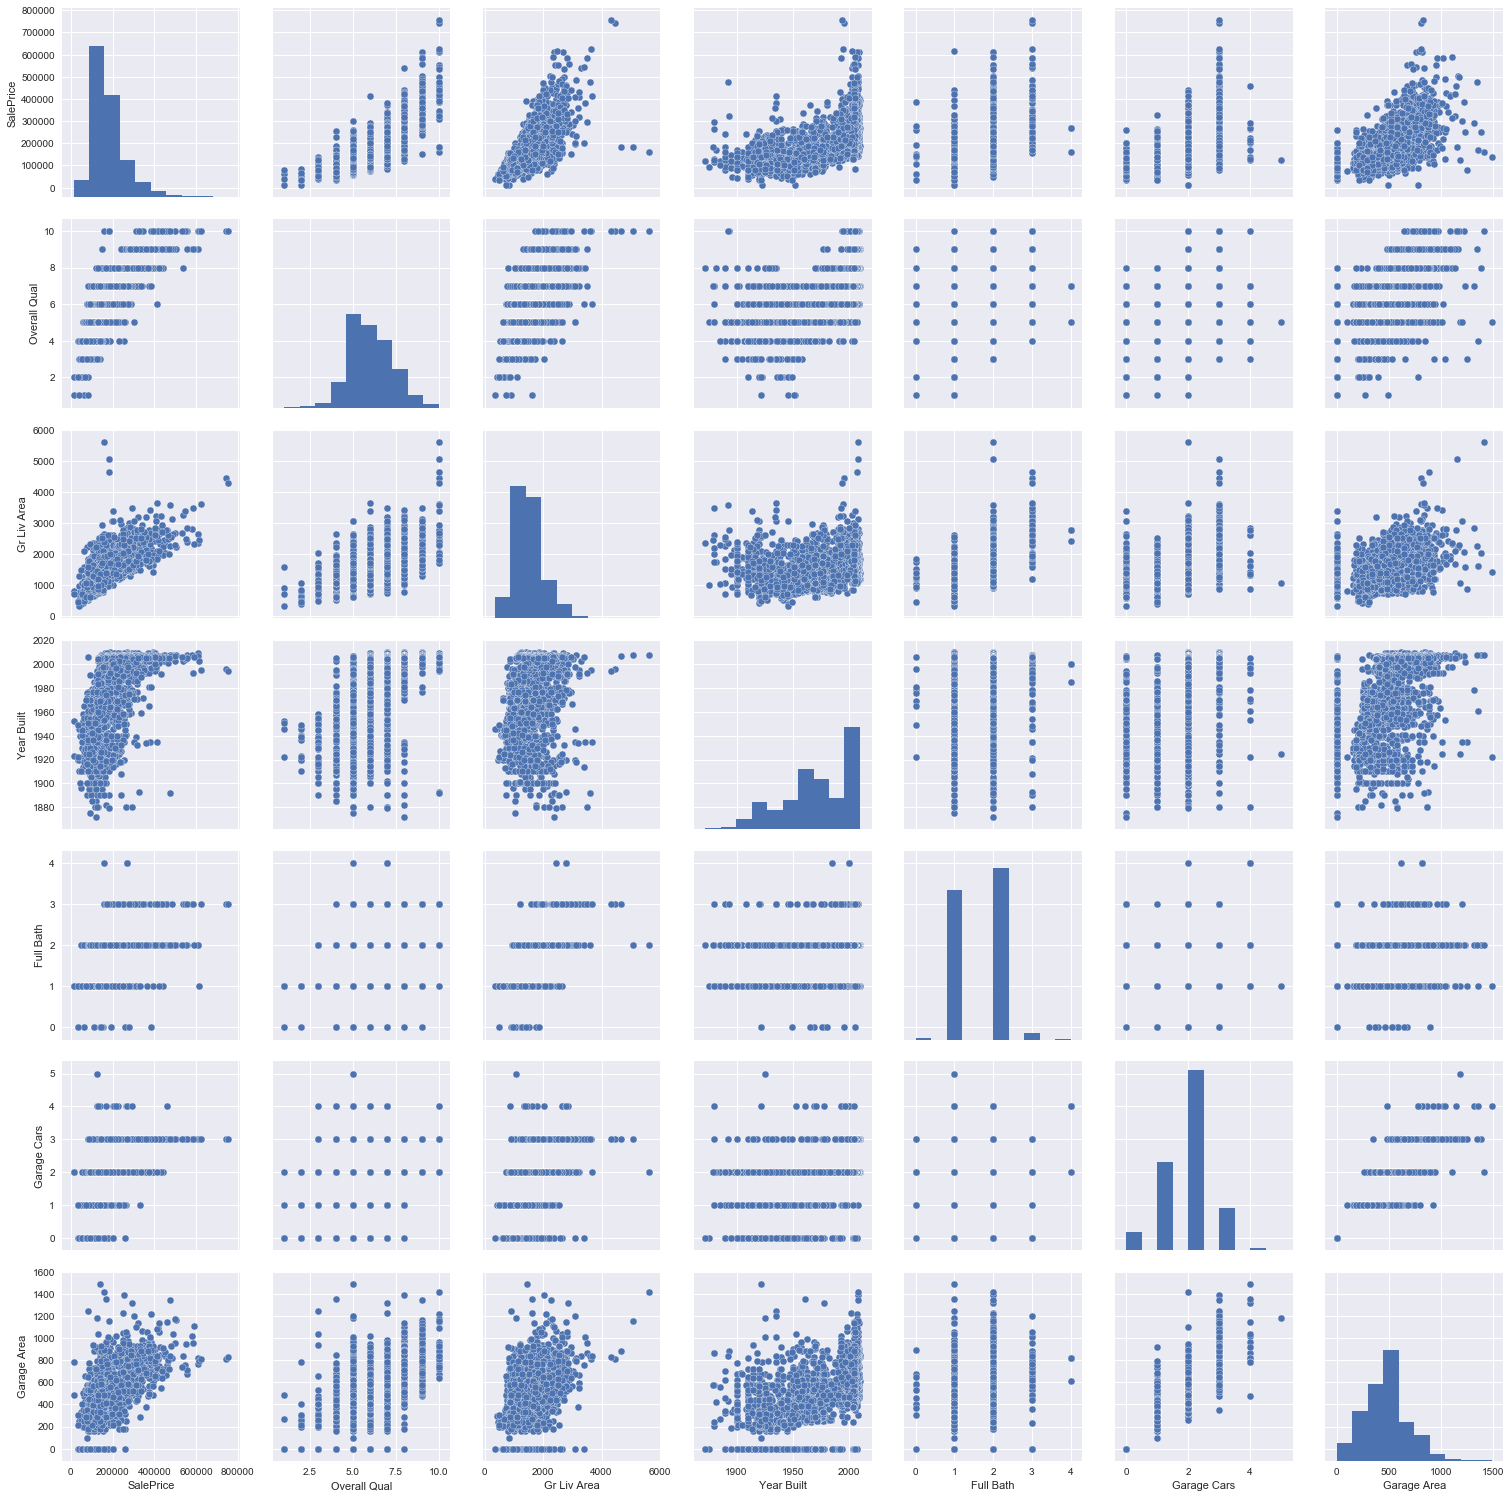

In [77]:
sns.set()
cols = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Year Built', 'Full Bath', 'Garage Cars', 'Garage Area']
sns.pairplot(ames_df[cols], size = 3)
plt.show()

In [103]:
# could have changed NA categories using this approach
for i in qualitative:
    ames_df[i] = ames_df[i].astype('category')
    if ames_df[i].isnull().any():
        ames_df[i] = ames_df[i].cat.add_categories(['Missing/NA'])
        ames_df[i] = ames_df[i].fillna('Missing/NA')

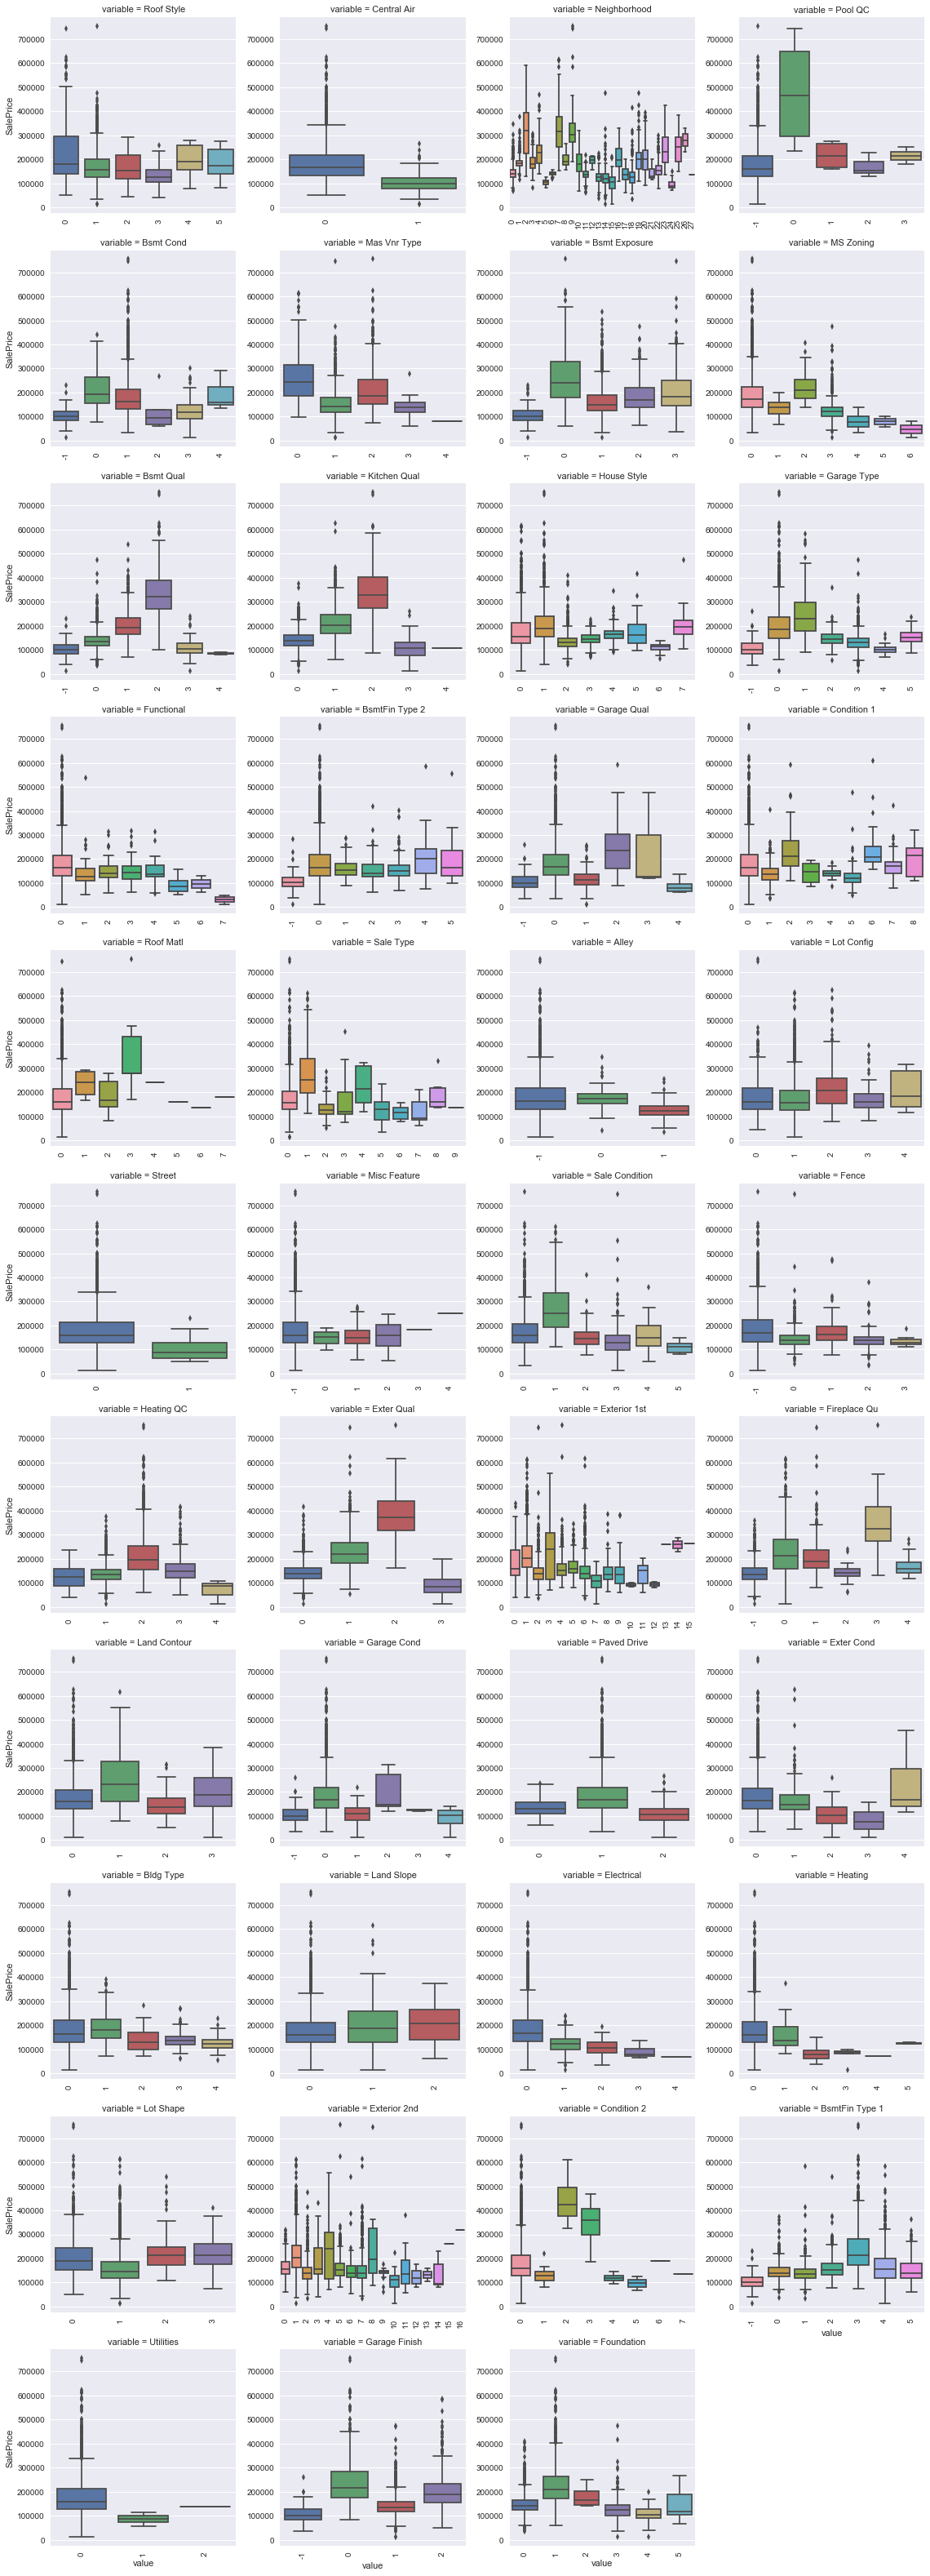

In [104]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

f = pd.melt(ames_df, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size=4)
g = g.map(boxplot, "value", "SalePrice")

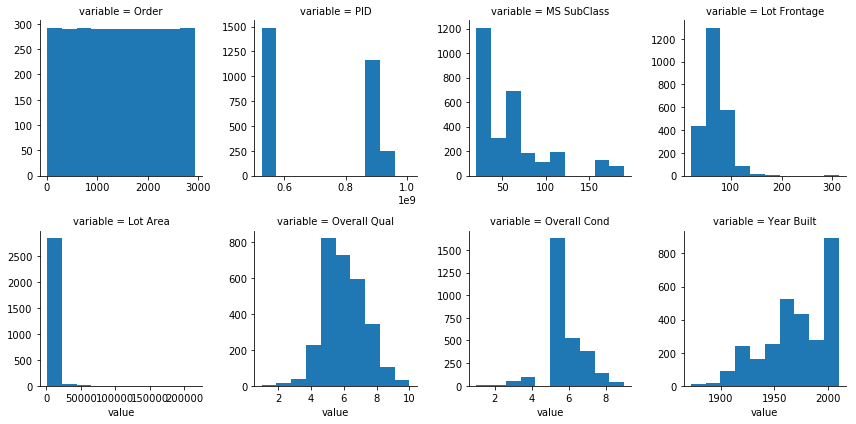

In [35]:
f = pd.melt(train, value_vars=quantitative[0:8])
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(plt.hist, "value")

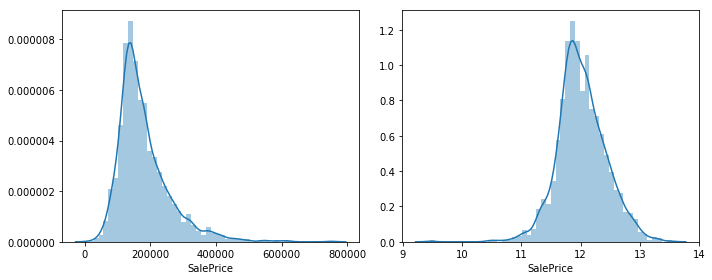

In [92]:
ames_sp = ames_df['SalePrice']
ames_sp_log = np.log(ames_sp)
fig, axs=plt.subplots(1,2,figsize=(10,4))
sns.distplot(ames_sp, ax = axs[0])
sns.distplot(ames_sp_log, ax = axs[1])
plt.tight_layout()

In [138]:
# dropping an individual column
ames_df.ix[:, ames_df.columns != 'SalePrice']
ames_df.drop('SalePrice', axis=1)
ames_df.shape

(2903, 82)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(ames_df.drop('SalePrice', axis=1), 
                                                    ames_df["SalePrice"], test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1945, 72)
(958, 72)
(1945,)
(958,)


In [96]:
GBR = GradientBoostingRegressor(n_estimators=12000,
            learning_rate=0.05, max_depth=3, max_features='sqrt',
            min_samples_leaf=15, min_samples_split=10, loss='huber')
GBR.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=12000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [98]:

# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [99]:
train_test(GBR, X_train, X_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=12000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2: 0.9928196478355863
RMSE: 6726.691796668847
Test
R2: 0.9141097335942832
RMSE: 21567.290896043927


In [52]:
pca = PCA(2)
quantitative_ml = list(quantitative)
quantitative_ml.remove('SalePrice')
len(quantitative_ml)

38

In [53]:
ames_pca = X_train.dropna(subset = ['Garage Yr Blt','Lot Frontage'])
ames_pca.shape

quantitative_ml = list(quantitative)
quantitative_ml.remove('SalePrice')
len(quantitative_ml)

pca = PCA(2)
pca.fit(ames_pca[quantitative_ml])
print(pca.explained_variance_)
print(np.sum(pca.explained_variance_ratio_))

[3.54962475e+16 5.27665572e+07]
0.9999999999346216


In [54]:
X_train = pca.transform(ames_pca[quantitative_ml])
ames_pca = X_test.dropna(subset = ['Garage Yr Blt','Lot Frontage'])
X_test = pca.transform(ames_pca[quantitative_ml])
print(X_train.shape)
print(X_test.shape)

(1541, 2)
(732, 2)


In [64]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
kmeans.labels_

array([1, 4, 3, ..., 9, 0, 3], dtype=int32)

In [65]:
kmeans.cluster_centers_

array([[-1.77623894e+08, -1.63573665e+03],
       [ 1.97469334e+08,  3.20743593e+02],
       [ 2.13019558e+08, -7.75385672e+02],
       [ 1.92699980e+08, -1.82764278e+03],
       [-1.81833706e+08,  1.12967215e+03],
       [ 2.05595677e+08,  6.68792087e+03],
       [-1.75160570e+08, -3.97876331e+01],
       [ 1.95636986e+08,  1.34739824e+03],
       [ 1.99650037e+08, -1.10070300e+03],
       [-1.82853637e+08, -4.10550909e+02]])

In [66]:
y_kmeans = kmeans.predict(X_test)

In [67]:
X_train

array([[ 1.98090396e+08, -7.58318925e+03],
       [-1.81666644e+08,  2.60142979e+03],
       [ 1.92108406e+08, -3.22660488e+03],
       ...,
       [-1.82769674e+08,  2.17278476e+03],
       [-1.78715634e+08, -1.23803114e+03],
       [ 1.92107416e+08, -4.12973452e+03]])

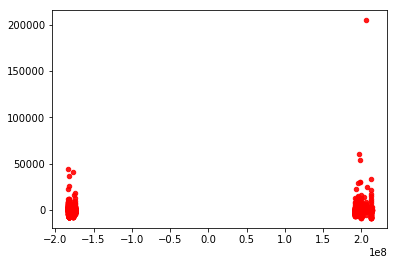

In [76]:
centers = kmeans.cluster_centers_
plt.scatter(X_train[:, 0], X_train[:, 1], c="red", s=20, alpha=.9);

References:

https://www.kaggle.com/maviator/simple-sklearn-models-averaging-to-get-to-13